In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from config import Conf
import os

In [36]:
print(Conf.trial_len)

5


In [114]:
iter = 4000
fname = 'data_' + str(iter) + '.npz'
# fpath = os.path.join(Conf.save_dir, fname)
fpath = os.path.join('../run_data', fname)
print(fpath)
data = np.load(fpath)

../run_data/data_4000.npz


In [115]:
inputs, targets, choices, ground_truth, p_A, hiddens, accs = data.values()

In [116]:
hiddens.shape

(64, 5000, 128)

100.0, 100.0, 100.0, 100.0, 91.1


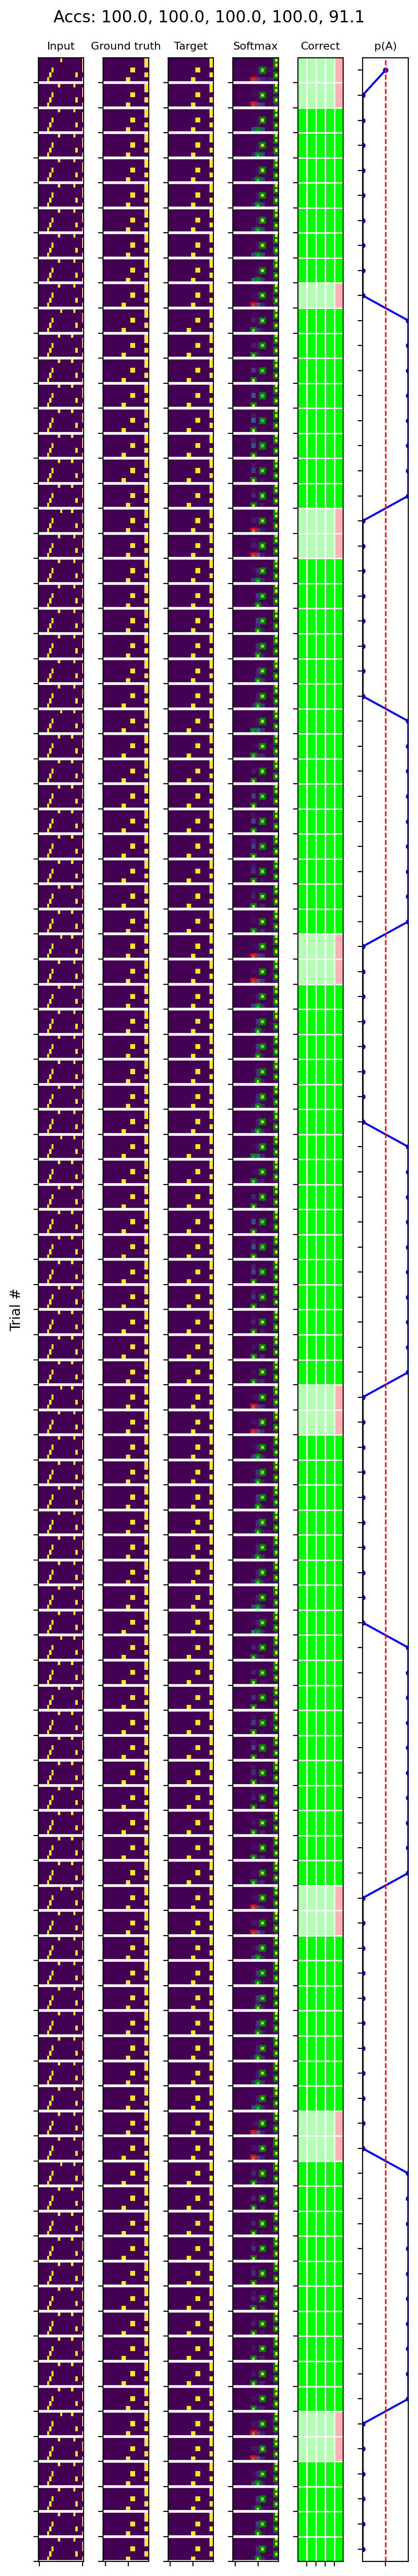

In [117]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

b = 1
trials = 100
t = Conf.trial_len * trials
sf = 1.1

fig, axes = plt.subplots(1,6, figsize=(sf*4, sf*t//20), dpi=200)
axes[0].imshow(inputs[b, :t, :], vmin=0, vmax=1, aspect='auto')
axes[0].set_title('Input', fontsize=8)
axes[0].set_ylabel('Trial #')
axes[1].imshow(ground_truth[b, :t, :], vmin=0, vmax=1, aspect='auto')
axes[1].set_title('Ground truth', fontsize=8)
axes[2].imshow(targets[b, :t, :], vmin=0, vmax=1, aspect='auto')
axes[2].set_title('Target', fontsize=8)
axes[3].imshow(choices[b, :t, :], vmin=0, vmax=1, aspect='auto')
axes[3].set_title('Softmax', fontsize=8)

# # Draw white lines every 4 rows
# for i in range(1, choices[b, :t, :].shape[0] // 4):
#     axes[0].axhline(y=i * 4 - 0.5, color='white', linewidth=2)
#     axes[1].axhline(y=i * 4 - 0.5, color='white', linewidth=2)
#     axes[2].axhline(y=i * 4 - 0.5, color='white', linewidth=2)

# Set yticks at every 4th row and enable gridlines only for those ticks
for i, ax in enumerate(axes):
    if i == len(axes)-1:
        start, gap, rows = 0.5, 1, trials
        ax.set_xticks(np.arange(0.5, Conf.trial_len, 1))
        ax.xaxis.grid(True, linestyle='-', color='white', linewidth=1)
    else:
        start, gap, rows = Conf.trial_len-0.5, Conf.trial_len, t
        ax.xaxis.grid(False)
    # Generate ytick locations, starting from 3.5 (since we want lines between blocks of 4)
    yticks = np.arange(start, rows, gap)
    ax.set_yticks(yticks)

    # Enable grid only for y-axis
    ax.yaxis.grid(True, linestyle='-', color='white', linewidth=2)

    # Optional: Hide x-axis grid lines
# Get the column indices of the largest value in each row of choices
max_choices = np.argmax(choices[b, :t, :], axis=1)
max_targets = np.argmax(targets[b, :t, :], axis=1)

# Iterate through each row and draw a red box around the cell with the largest value
for i, (choice, target) in enumerate(zip(max_choices, max_targets)):
    c = 'green' if choice==target else 'red'
    rect = patches.Rectangle((choice-0.5, i-0.5), 1, 1, linewidth=1.5, edgecolor=c, facecolor='none')
    axes[3].add_patch(rect)

correct = (np.argmax(choices, axis=-1) == np.argmax(targets, axis=-1)).reshape((choices.shape[0], choices.shape[1]//Conf.trial_len, Conf.trial_len))
# axes[3].imshow(correct[b, :trials, :], aspect='auto')
axes[4].set_title('Correct', fontsize=8)
# Create a color matrix with the same shape as your correct/incorrect matrix
# Initialize it fully transparent
color_matrix = np.zeros((*correct[b, :trials, :].shape, 4))

# Set red color with alpha=0.5 for cells with 0
color_matrix[correct[b, :trials, :] == 0] = [1, 0, 0, 0.3]  # Red with alpha 0.5

# Set green color with alpha=0.5 for cells with 1
color_matrix[correct[b, :trials, :] == 1] = [0, 1, 0, 0.3]  # Green with alpha 0.5

# Now identify rows where all values are 1 and set alpha=1.0 for those cells
all_correct_rows = np.all(correct[b, :trials, :] == 1, axis=1)
color_matrix[all_correct_rows, :, 3] = 1.0  # Set alpha to 1.0 for these rows

# Display the color matrix using imshow
axes[4].imshow(color_matrix, aspect='auto')
axes[4].set_xticks(np.arange(0.5, Conf.trial_len-0.5, 1))
axes[4].set_yticks(np.arange(0.5, trials-0.5, 1))
axes[4].grid(True, linestyle='-', color='white', linewidth=1)
# q: how do I turn on grid on this axis
# a: 

for ax in axes:
    ax.set_yticklabels([])
    ax.set_xticklabels([])

axes[5].plot(p_A[b, :trials], 0.5 + np.arange(trials), marker='o', markersize=3, color='b')
axes[5].set_ylim([0, trials])
axes[5].set_xlim([0, 1])
axes[5].invert_yaxis()
axes[5].axvline(x=0.5, color='red', linestyle='--', linewidth=1)
axes[5].set_title('p(A)', fontsize=8)
# q: how do I plot this vertically, so that the x axis and y axis are swapped?
# 

proportion_correct = 100 * np.sum(correct, axis=(0,1)) / (correct.shape[0]*correct.shape[1])
proportion_correct = ', '.join([f'{p:.1f}' for p in proportion_correct])
print(proportion_correct)
# Set the suptitle of the figure with the calculated proportion
fig.suptitle('Accs: ' + proportion_correct)

plt.tight_layout(rect=[0, 0, 1, 0.985]) # Adjust layout to make space for suptitle
plt.show()

fig.savefig(os.path.join(Conf.save_dir, 'panel.png'))


In [118]:
a = np.arange(10)
print(a)
print(a[::3])
print(a[1::3])

[0 1 2 3 4 5 6 7 8 9]
[0 3 6 9]
[1 4 7]


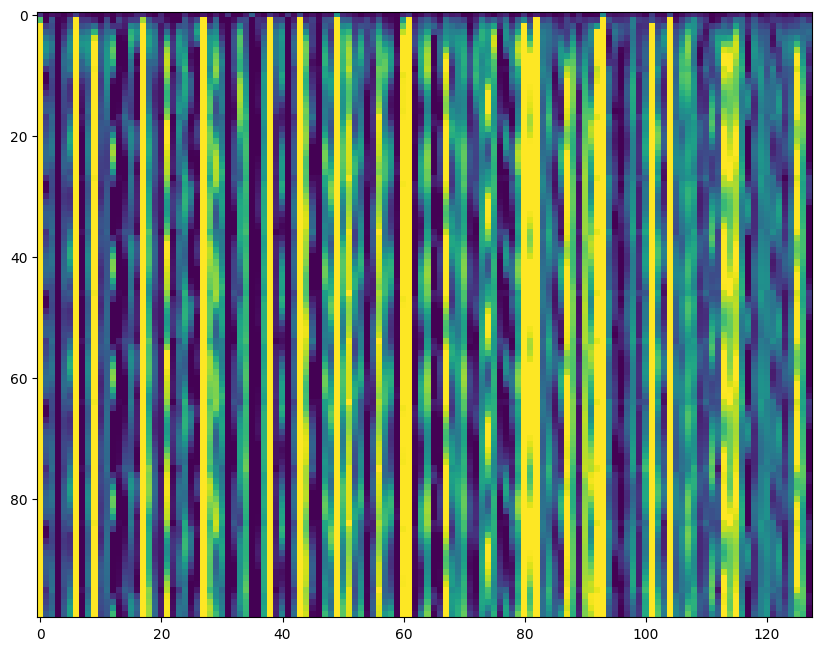

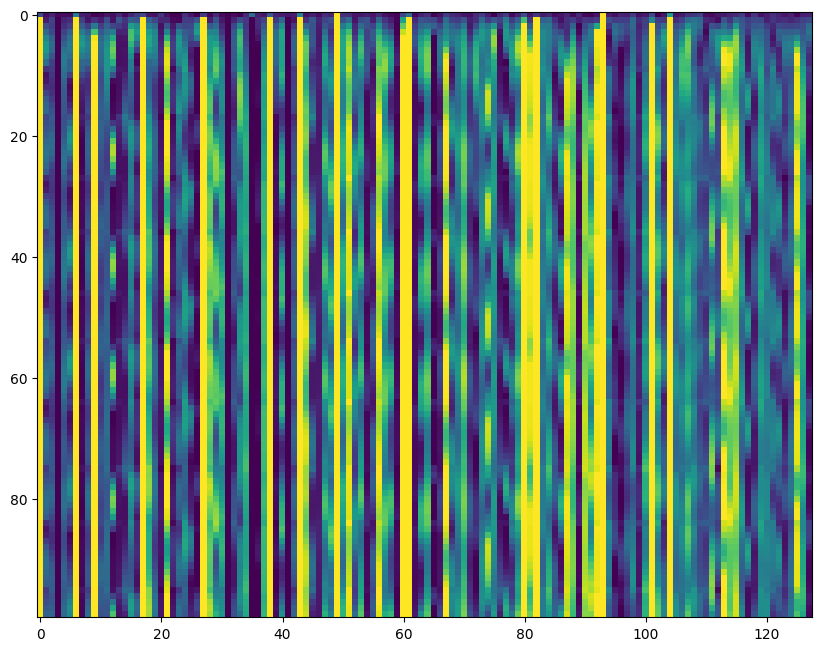

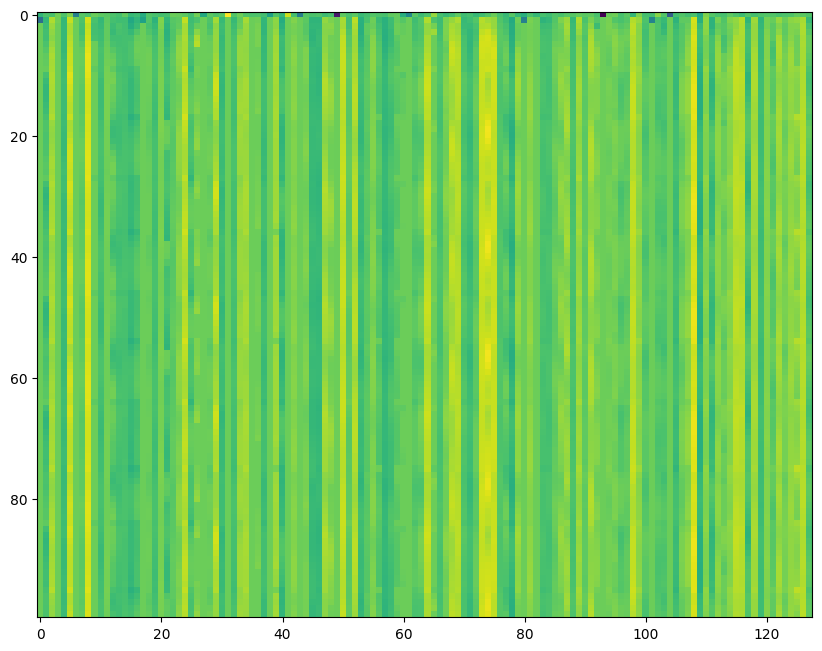

In [122]:
b=0
choice_hiddens = hiddens[b, ::5, :][:100, :]
init_hiddens = hiddens[b, 1::5, :][:100, :]
# q: how to take every 5 elements of array, but only upto 100 elements?
# a:
plt.figure(figsize=(10, 10))
plt.imshow(choice_hiddens)
plt.figure(figsize=(10, 10))
plt.imshow(init_hiddens)
plt.figure(figsize=(10, 10))
plt.imshow(choice_hiddens-init_hiddens)
